In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("~/docs/clgdocs/TY/SEM V/ML/DATASET/Social_Net_class.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = df[['Age', 'EstimatedSalary']]

In [5]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y = df[['Purchased']]

In [7]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()

In [12]:
ss.fit(x_train)

StandardScaler()

In [14]:
x_train_scaled = ss.transform(x_train)

In [15]:
x_test_scaled = ss.transform(x_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(x_train_scaled, y_train)

/usr/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [19]:
y_predict = model.predict(x_test_scaled)

In [20]:
y_predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [21]:
model.score(x_test_scaled, y_test)

0.91

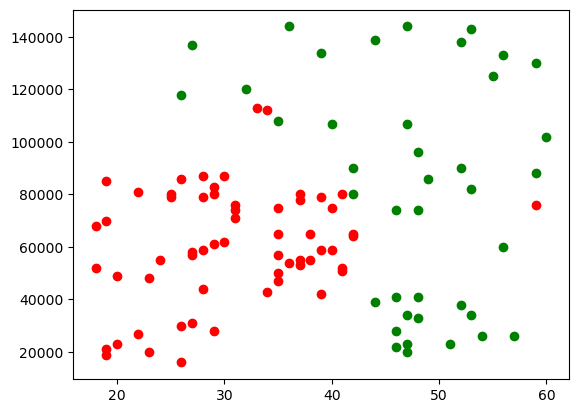

In [22]:
plt.scatter(x_test[y_predict == 0]['Age'], x_test[y_predict == 0]['EstimatedSalary'], c = 'r')
plt.scatter(x_test[y_predict == 1]['Age'], x_test[y_predict == 1]['EstimatedSalary'], c = 'g')

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cc = confusion_matrix(y_test, y_predict)

In [25]:
cc

array([[57,  6],
       [ 3, 34]])